# Exam
Each task gives 1 point. The amount of earned points will be recomputed to the maximum of 20% of the final grade.

You can do the tasks in any order although it is recommended to do them from top to bottom.<br>
If some task looks too difficult, you can skip it and get back to it later.
<br><br>
*Note: You are allowed to use only those function libraries that were used in the lectures.*

---

You will work with the __*'blog-gender-dataset'*__ corpus. It contains 1500 files which are blog posts written by various authors at various blogging platforms. It is a categorized corpus, it contains two categories - *'female'* and *'male'* - identifying the gender of a post's author.<br><br>
*Note: In any of the tasks, don't print full contents of the corpus or your notebook file will be too big for submitting.*

---
### Task 1
Print the following information about the corpus:
1. The total number of blog posts in the corpus.
2. Number of blog posts by female authors.
3. Number of blog posts by male authors.
4. The total number of words in the corpus.
5. Number of words in blogs by female authors.
6. Number of words in blogs by male authors.
7. Average number of words per blog post by female authors.
8. Average number of words per blog post by male authors.

In [2]:
import nltk
from nltk.corpus import CategorizedPlaintextCorpusReader

corpus_root = r'c:\Users\grace\VisualStudioProject\NLP_exam\data\blog-gender-dataset'

corpus = CategorizedPlaintextCorpusReader(
    corpus_root,
    r'.*\.txt',
    cat_file='cats.list'
)

total_posts = len(corpus.fileids())
female_posts = len(corpus.fileids(categories='female'))
male_posts = len(corpus.fileids(categories='male'))
total_words = len(corpus.words())
female_words = len(corpus.words(categories='female'))
male_words = len(corpus.words(categories='male'))
avg_words_female = female_words / female_posts if female_posts else 0
avg_words_male = male_words / male_posts if male_posts else 0

print("Total number of blog posts:", total_posts)
print("Number of blog posts by female authors:", female_posts)
print("Number of blog posts by male authors:", male_posts)
print("Total number of words in the corpus:", total_words)
print("Number of words in blogs by female authors:", female_words)
print("Number of words in blogs by male authors:", male_words)
print("Average number of words per blog post by female authors:", round(avg_words_female, 2))
print("Average number of words per blog post by male authors:", round(avg_words_male, 2))


Total number of blog posts: 1500
Number of blog posts by female authors: 695
Number of blog posts by male authors: 805
Total number of words in the corpus: 910283
Number of words in blogs by female authors: 401477
Number of words in blogs by male authors: 508806
Average number of words per blog post by female authors: 577.66
Average number of words per blog post by male authors: 632.06


---
### Task 2
For each category of the corpus, show a plot of top 30 most frequent words. Don't include words that contain non-alphabetic characters or are stop-words.

Expected result: two plots.

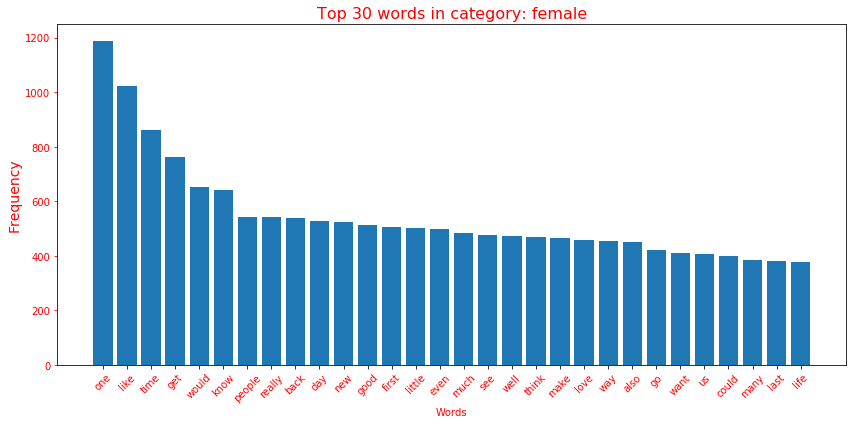

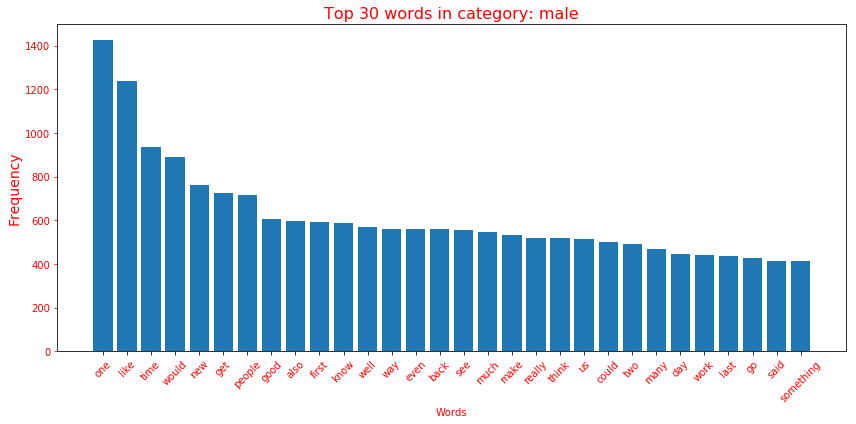

In [3]:

%matplotlib inline
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


stop_words = set(stopwords.words('english'))

def plot_top_words(category):
    words = corpus.words(categories=category)
    filtered = [w.lower() for w in words if w.isalpha() and w.lower() not in stop_words]
    freq_dist = nltk.FreqDist(filtered)
    top_words = freq_dist.most_common(30)

    words_, counts_ = zip(*top_words)
    plt.figure(figsize=(12,6))
    plt.bar(words_, counts_)
    plt.title('Top 30 words in category: ' + category, color='red', fontsize=16)
    plt.xlabel('Words', color='red')
    plt.ylabel('Frequency', color='red', fontsize=14)
    plt.xticks(rotation=45, color='red')
    
    plt.tick_params(axis='y', colors='red')
    plt.tight_layout()
    plt.show()

plot_top_words('female')
plot_top_words('male')


---
### Task 3
Part 1: Compute the average sentiment of blog posts for each of the two categories using the VADER sentiment analyzer.

Expected result: two numbers.<br>
*Hint: if running the code takes more than 30 seconds, you are doing something wrong.*

In [10]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def avg_sentiment(category):
    total_score = 0.0
    fileids = corpus.fileids(categories=category)
    for fid in fileids:
        text = corpus.raw(fid)
        score = sia.polarity_scores(text)['compound'] 
        total_score += score
    return total_score / len(fileids) if fileids else 0

avg_female = avg_sentiment('female')
avg_male = avg_sentiment('male')

print("Average sentiment for female authors:", avg_female)
print("Average sentiment for male authors:", avg_male)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Average sentiment for female authors: 0.6455166906474823
Average sentiment for male authors: 0.5873290683229813


Part 2: Find blogpost of the most positive sentiment. Print its sentiment value and its full text.

Expected result: one number and a posts text.<br>
*Hint: if running the code takes more than 30 seconds, you are doing something wrong.*

In [6]:
max_sentiment = -1  
max_text = ""

for fid in corpus.fileids():
    text = corpus.raw(fid)
    score = sia.polarity_scores(text)['compound']
    if score > max_sentiment:
        max_sentiment = score
        max_text = text

print("Most positive sentiment value:", max_sentiment)
print("\nFull text of the most positive blog post:\n")
print(max_text)

Most positive sentiment value: 1.0

Full text of the most positive blog post:

( beavertail cactus in bloom) " i hold no preference among flowers, so long as they are wild, free and spontaneous" ~desert solitaire~ edward abbey (ocotillo blossoms) we found very few wildflowers, beautiful, but few. it seems the daily reports we'd read were not all that accurate. (desert sunflower & lupine) we weren't alone in that thinking either, there were droves of people that came for the predicted event. everyone asking "where are the flowers?" the epic wildflower bloom, ah well, mother nature surely decides these things, not us, doesn't she? (cholla (choy-ya) cactus) so we set about enjoying all the many other treasures the desert has to offer... in the desert the best way to see is to get quiet... get away from the crowds... get down on your knees for a closer look... find hearts and think of all your friends ♥ and take some hikes...we went from this to... this! we hiked six miles to an oasis, you

---
### Task 4
Show all phrases in the form `adjective + noun` in the first 50 sentences in the category *'female'*. Don't show phrases where any of the words contain non-alphabetic characters, are stop-words, or are shorter than two letters.

Expected result: one list.

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
sentences = corpus.sents(categories='female')[:50]

adj_noun_phrases = []

for sent in sentences:
    tagged = nltk.pos_tag(sent)
    for i in range(len(tagged) - 1):
        word1, tag1 = tagged[i]
        word2, tag2 = tagged[i + 1]
        if (tag1.startswith('JJ') and tag2.startswith('NN')):
            if (word1.isalpha() and word2.isalpha() and
                word1.lower() not in stopwords and word2.lower() not in stopwords and
                len(word1) > 1 and len(word2) > 1):
                adj_noun_phrases.append((word1, word2))

print("Number of filtered adjective+noun phrases:", len(adj_noun_phrases))

freq_dist = nltk.FreqDist(adj_noun_phrases)
for phrase, freq in freq_dist.most_common(20):
    print(' '.join(phrase) + '\t' + str(freq))

print([ ' '.join(phrase) for phrase in adj_noun_phrases ])
print("Total number of adjective+noun phrases:", len(adj_noun_phrases))

Number of filtered adjective+noun phrases: 43
aromatic delicacies	1
right knife	1
good part	1
exotic dishes	1
high pressure	1
assignment parties	1
crucial piece	1
fragrant sugar	1
sweet milk	1
special dishes	1
arre yeh	1
ye toh	1
jitna nahi	1
nice person	1
trustwrthy person	1
keep smilin	1
good service	1
vital stats	1
yesteryear movie	1
much prevalent	1
['aromatic delicacies', 'right knife', 'good part', 'exotic dishes', 'high pressure', 'assignment parties', 'crucial piece', 'fragrant sugar', 'sweet milk', 'special dishes', 'arre yeh', 'ye toh', 'jitna nahi', 'nice person', 'trustwrthy person', 'keep smilin', 'good service', 'vital stats', 'yesteryear movie', 'much prevalent', 'male member', 'major decisions', 'different families', 'basic objective', 'pacey homo', 'escapist behaviors', 'mundane chores', 'many forms', 'hypocritical society', 'double standards', 'proven fact', 'certain things', 'female fetuscide', 'conventional writers', 'lecherous gaze', 'humiliating experiences', 'sma

---
### Task 5
Compute frequency of each `adjective + noun` phrase in the whole corpus. Show a frequency plot with top 20 most frequent phrases. Don't count phrases where any of the words contain non-alphabetic characters, are stop-words, or are shorter than two letters.

Expected result: one plot.

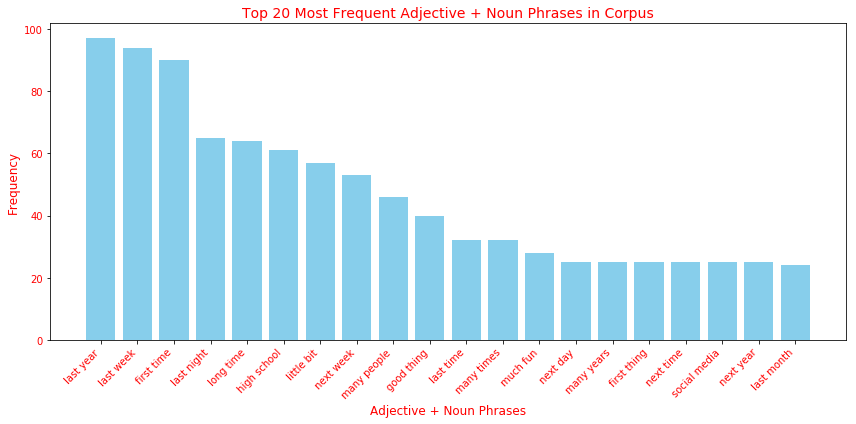

In [8]:
stopwords = nltk.corpus.stopwords.words('english')
all_sents = corpus.sents()  

adj_noun_phrases = []

for sent in all_sents:
    tagged = nltk.pos_tag(sent)
    for i in range(len(tagged) - 1):
        word1, tag1 = tagged[i]
        word2, tag2 = tagged[i + 1]
        if (tag1.startswith('JJ') and tag2.startswith('NN')):
            if (word1.isalpha() and word2.isalpha() and
                word1.lower() not in stopwords and word2.lower() not in stopwords and
                len(word1) > 1 and len(word2) > 1):
                adj_noun_phrases.append((word1.lower(), word2.lower()))

freq_dist = nltk.FreqDist(adj_noun_phrases)

top_20 = freq_dist.most_common(20)
phrases = [' '.join(p) for p, _ in top_20]
frequencies = [freq for _, freq in top_20]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_20)), frequencies, color='skyblue')
plt.xticks(range(len(top_20)), phrases, rotation=45, ha='right', color='red')  
plt.yticks(color='red')  
plt.xlabel('Adjective + Noun Phrases', fontsize=12, color='red')
plt.ylabel('Frequency', fontsize=12, color='red')
plt.title('Top 20 Most Frequent Adjective + Noun Phrases in Corpus', fontsize=14, color='red')
plt.tight_layout()
plt.show()